In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def calculate_decay_constant(r90_hrs: float):
    """
    Calculate decay constant for use in TM-21 model.

    Parameters:
    - r90_hrs: Time in hours when brightness drops to 90%.
    """

    r"""
    Convert half-life to decay constant k using:
    $$
        L(r90\_hours) = L_0 * e^{-k \cdot r90\_hours} = 0.9L_0
    $$
    $$
        e^{-k \cdot r90\_hours} = 0.9 = e^{\ln(0.9)}
    $$
    $$
        0.9 = e^{-k \cdot r90\_hours} = e^{\ln(0.9)}
    $$
    $$
        k = \frac{\ln(0.9)}{r90\_hours}
    $$
    """
    decay_k = -np.log(0.9) / r90_hrs
    return decay_k

In [ ]:
def calculate_relative_decay(decay_k: float, start_hours: float, end_hours: float):
    """
    Calculate the relative decay between two time points.
    This is used to calculate the relative brightness at a given time.
    
    Parameters:
    - decay_k: Decay constant.
    - start_hours: Start time in hours.
    - end_hours: End time in hours.
    """
    # np.exp(-decay_k * end_hours) / np.exp(-decay_k * start_hours) but optimised
    return np.exp(decay_k*(start_hours-end_hours))

In [ ]:
data = np.load("./dataset/heatmaps/heatmap_176_fitted/cleaned_LAMBERTIAN-IDW.npy")
i = 0
t = 50000
decay_k = calculate_decay_constant(33000)

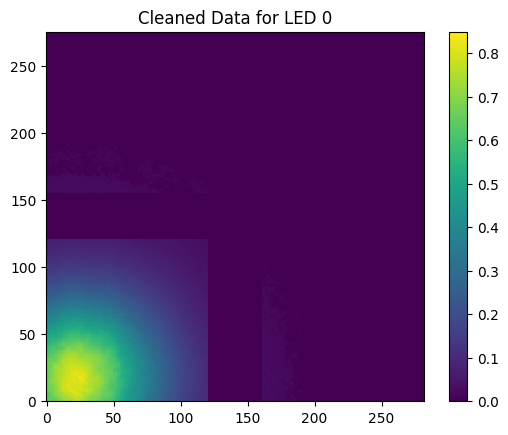

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[:, :, i].clip(0, 1), interpolation='nearest', origin='lower')
plt.colorbar()
plt.title(f"Cleaned Data for LED {i}")
plt.show()

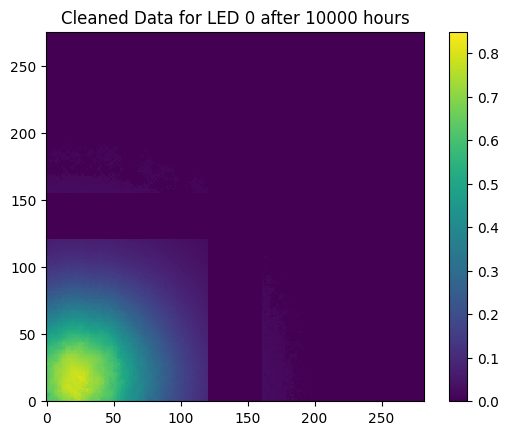

In [ ]:
import matplotlib.pyplot as plt

plt.imshow((data[:, :, i] * calculate_relative_decay(decay_k, 0, 10000)).clip(0, 1), interpolation='nearest', origin='lower', vmin=0, vmax=data[:, :, i].max())
plt.colorbar()
plt.title(f"Cleaned Data for LED {i} after {10000} hours")
plt.show()

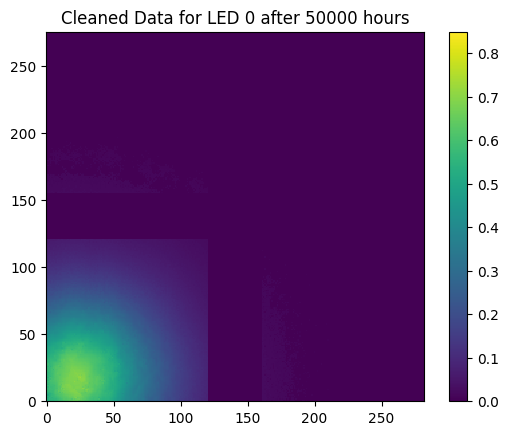

In [ ]:
import matplotlib.pyplot as plt

plt.imshow((data[:, :, i] * calculate_relative_decay(decay_k, 0, t)).clip(0, 1), interpolation='nearest', origin='lower', vmin=0, vmax=data[:, :, i].max())
plt.colorbar()
plt.title(f"Cleaned Data for LED {i} after {t} hours")
plt.show()

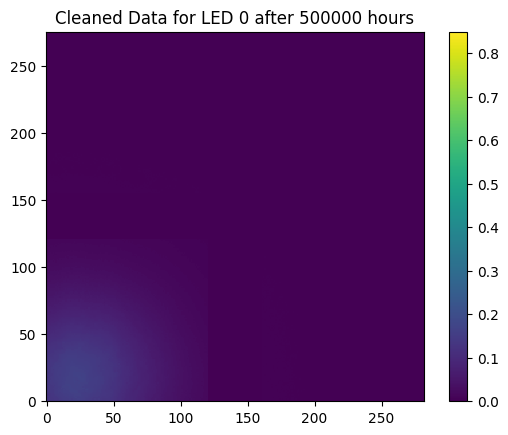

In [ ]:
import matplotlib.pyplot as plt

plt.imshow((data[:, :, i] * calculate_relative_decay(decay_k, 0, t*10)).clip(0, 1), interpolation='nearest', origin='lower', vmin=0, vmax=data[:, :, i].max())
plt.colorbar()
plt.title(f"Cleaned Data for LED {i} after {t*10} hours")
plt.show()

In [ ]:
aged_data = (data * calculate_relative_decay(decay_k, 0, t))
aged_data[aged_data < 0] = -1 # Reintroduce the non measured values

In [ ]:
np.save("aged.npy", aged_data)

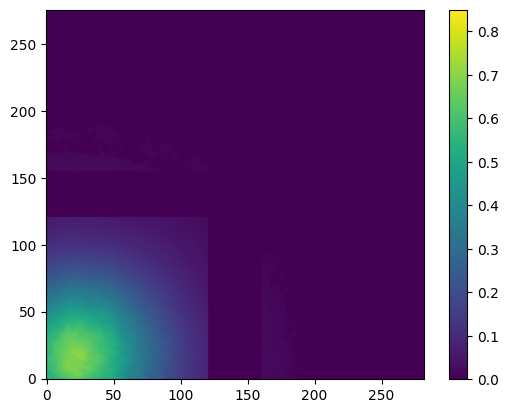

In [ ]:
plt.imshow(aged_data[:, :, i].clip(0, 1), origin="lower", vmin=0, vmax=data[:, :, 0].max())
plt.colorbar()

In [ ]:
really_aged_data = (data * calculate_relative_decay(decay_k, 0, t*10))
really_aged_data[really_aged_data < 0] = -1 # Reintroduce the non measured values

In [ ]:
np.save("really_aged.npy", really_aged_data)

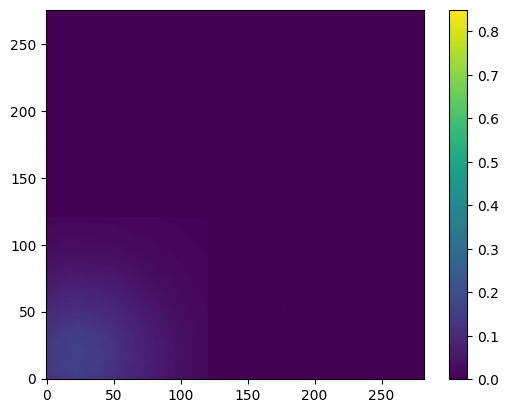

In [ ]:
plt.imshow(really_aged_data[:, :, i].clip(0, 1), origin="lower", vmin=0, vmax=data[:, :, 0].max())
plt.colorbar()